In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
coordinates

[(36.7107582737691, -84.94733305841105),
 (-23.956732092291176, 68.62268121888249),
 (55.63391658762848, 75.82883525495413),
 (79.69727265802098, -28.32225911374715),
 (63.725804596559755, -9.009922639010028),
 (-80.55607185291082, 178.84698547390656),
 (47.51829641244433, 165.2053766751555),
 (-11.555738912230566, 70.55382752728923),
 (-71.19682571133352, 134.7872996351294),
 (-4.8844735195955025, -11.678052713489024),
 (-66.30599233855615, 26.94396949076628),
 (-50.12571868705753, -51.42969252787779),
 (46.024611320266416, 55.031919517384296),
 (-72.7471010283906, 161.77932885588712),
 (28.73480358102651, -57.7888562678133),
 (-59.41054360622004, -40.63486908471441),
 (82.93760784128557, 57.43795338334269),
 (-81.44075222071152, -110.75208444840416),
 (22.688546356102833, 167.3199813250228),
 (-37.97095291810339, 59.289366554473645),
 (-56.13298088057679, -87.80343955569887),
 (-28.504360499186504, 108.61679777190989),
 (22.135184855082855, -80.52088935630073),
 (-18.063536317535693,

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | somerset
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | ust-tarka
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | sorvag
City not found. Skipping...
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | beyneu
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | geral

Processing Record 36 of Set 4 | balabac
Processing Record 37 of Set 4 | hilo
Processing Record 38 of Set 4 | constitucion
Processing Record 39 of Set 4 | high level
Processing Record 40 of Set 4 | marcona
City not found. Skipping...
Processing Record 41 of Set 4 | kijini
Processing Record 42 of Set 4 | samarai
Processing Record 43 of Set 4 | port blair
Processing Record 44 of Set 4 | muisne
Processing Record 45 of Set 4 | nalut
Processing Record 46 of Set 4 | mae sai
Processing Record 47 of Set 4 | puerto penasco
Processing Record 48 of Set 4 | port hardy
Processing Record 49 of Set 4 | kaili
Processing Record 50 of Set 4 | guerrero negro
Processing Record 1 of Set 5 | bognor regis
Processing Record 2 of Set 5 | alugan
Processing Record 3 of Set 5 | aripuana
Processing Record 4 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 5 of Set 5 | sao joao da barra
Processing Record 6 of Set 5 | tasiilaq
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | kon

Processing Record 30 of Set 8 | turmalina
Processing Record 31 of Set 8 | maungaturoto
Processing Record 32 of Set 8 | la tuque
Processing Record 33 of Set 8 | nakusp
Processing Record 34 of Set 8 | saleaula
City not found. Skipping...
Processing Record 35 of Set 8 | wasilla
Processing Record 36 of Set 8 | piranhas
Processing Record 37 of Set 8 | langres
Processing Record 38 of Set 8 | maldonado
Processing Record 39 of Set 8 | menongue
Processing Record 40 of Set 8 | amapa
Processing Record 41 of Set 8 | barbar
City not found. Skipping...
Processing Record 42 of Set 8 | nsanje
Processing Record 43 of Set 8 | adrar
Processing Record 44 of Set 8 | caohai
Processing Record 45 of Set 8 | hambantota
Processing Record 46 of Set 8 | richards bay
Processing Record 47 of Set 8 | leh
Processing Record 48 of Set 8 | mildura
Processing Record 49 of Set 8 | egvekinot
Processing Record 50 of Set 8 | wanning
Processing Record 1 of Set 9 | vredendal
Processing Record 2 of Set 9 | oneonta
Processing Re

Processing Record 21 of Set 12 | orlik
Processing Record 22 of Set 12 | mitu
Processing Record 23 of Set 12 | chimbote
Processing Record 24 of Set 12 | rosita
Processing Record 25 of Set 12 | novyy urengoy
Processing Record 26 of Set 12 | wagar
Processing Record 27 of Set 12 | luganville
Processing Record 28 of Set 12 | muncar
Processing Record 29 of Set 12 | gebre guracha
Processing Record 30 of Set 12 | amboise
Processing Record 31 of Set 12 | luba
Processing Record 32 of Set 12 | tazovskiy
Processing Record 33 of Set 12 | manado
Processing Record 34 of Set 12 | nadym
Processing Record 35 of Set 12 | boa vista
Processing Record 36 of Set 12 | miles city
Processing Record 37 of Set 12 | doume
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Somerset,40.57,-74.55,73.99,94,90,3.36,US,2020-07-11 01:19:03
1,Bambous Virieux,-20.34,57.76,69.01,88,75,24.16,MU,2020-07-11 01:19:03
2,Ust-Tarka,55.57,75.70,61.45,84,3,7.38,RU,2020-07-11 01:19:03
3,Kaitangata,-46.28,169.85,53.01,53,31,11.01,NZ,2020-07-11 01:14:52
4,Nikolskoye,59.70,30.79,57.20,93,90,6.71,RU,2020-07-11 01:19:03
5,Hithadhoo,-0.60,73.08,83.44,74,94,8.39,MV,2020-07-11 01:19:03
6,New Norfolk,-42.78,147.06,43.00,92,100,2.13,AU,2020-07-11 01:19:04
7,Georgetown,5.41,100.34,82.40,94,20,4.70,MY,2020-07-11 01:17:31
8,Kruisfontein,-34.00,24.73,53.04,61,48,14.63,ZA,2020-07-11 01:19:04
9,Mar Del Plata,-38.00,-57.56,43.00,75,0,12.75,AR,2020-07-11 01:18:07


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
City_list = city_data_df[new_column_order]
City_list.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Somerset,US,2020-07-11 01:19:03,40.57,-74.55,73.99,94,90,3.36
1,Bambous Virieux,MU,2020-07-11 01:19:03,-20.34,57.76,69.01,88,75,24.16
2,Ust-Tarka,RU,2020-07-11 01:19:03,55.57,75.70,61.45,84,3,7.38
3,Kaitangata,NZ,2020-07-11 01:14:52,-46.28,169.85,53.01,53,31,11.01
4,Nikolskoye,RU,2020-07-11 01:19:03,59.70,30.79,57.20,93,90,6.71


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/10/20'

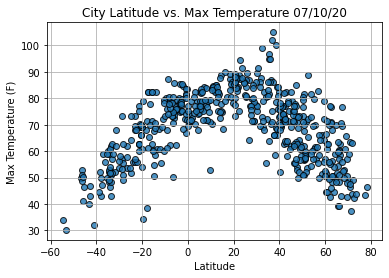

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

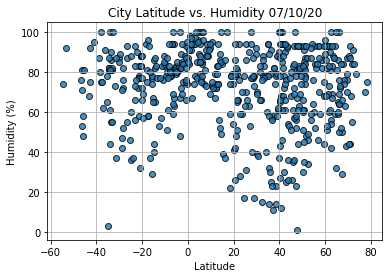

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

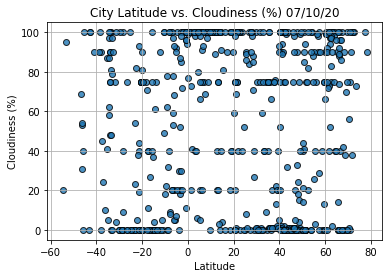

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

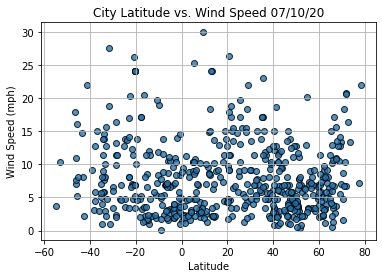

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Lat                        -53.15
Lng                        -70.92
Max Temp                     30.2
Humidity                       92
Cloudiness                     95
Wind Speed                  10.29
Country                        CL
Date          2020-07-11 01:19:04
Name: 13, dtype: object